In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring Data

In [2]:
sales=pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')

In [3]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


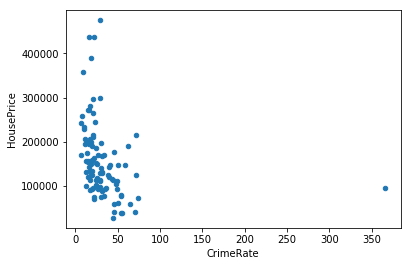

In [4]:
sales.plot(x="CrimeRate",y='HousePrice',kind="scatter")
plt.show()

# Fit the regression model using crime as the feature

In [5]:
x=np.array(sales['CrimeRate'])
y=np.array(sales['HousePrice'])
x=x.reshape(-1,1)      #LR model requires n_sample,n_features dimension
y=y.reshape(-1,1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
crime_model=LinearRegression()

In [8]:
crime_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

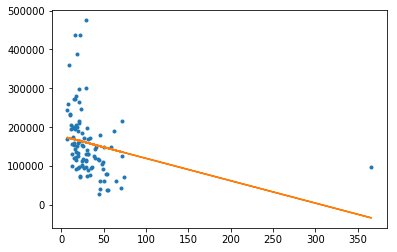

In [11]:
#input feature in CrimeRate so the input value in the sales column is itself just crime.
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(x),'-')

# Remove Center City and Redo the analysis

In [12]:
sales_noCC=sales[sales['MilesPhila']!=0.0]

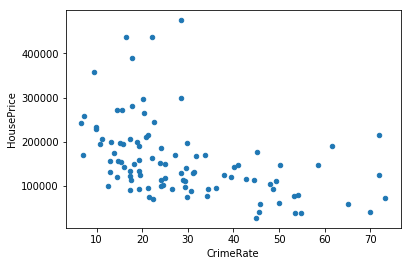

In [13]:
sales_noCC.plot(kind='scatter',x='CrimeRate',y='HousePrice')
plt.show()

In [14]:
crime_model_noCC=LinearRegression()

In [15]:
x_noCC=np.array(sales_noCC['CrimeRate']).reshape(-1,1)
y_noCC=np.array(sales_noCC['HousePrice']).reshape(-1,1)

In [16]:
crime_model_noCC.fit(x_noCC,y_noCC)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

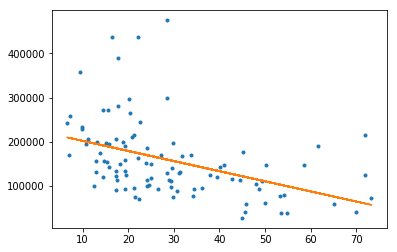

In [17]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model_noCC.predict(x_noCC),'-')

# Compare coefficients

In [18]:
crime_model.coef_,crime_model.intercept_

(array([[-576.90812768]]), array([176629.40810695]))

In [19]:
crime_model_noCC.coef_,crime_model_noCC.intercept_

(array([[-2288.68942995]]), array([225233.551839]))

# High leverage points :
 Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations. As a result, recalling the closed-form solution for simple regression, this point has the potential to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point. If a high leverage point follows the trend of the other data, this might not have much effect. On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

# Influential observations:
An influential observation is one where the removal of the point significantly changes the fit. As discussed above, high leverage points are good candidates for being influential observations, but need not be. Other observations that are not leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

# Remove high-value outliers

In [20]:
sales_nohighend=sales_noCC[sales_noCC['HousePrice']<350000]

In [21]:
crime_model_nohighend=LinearRegression()

In [22]:
x_nohighend=np.array(sales_nohighend['CrimeRate']).reshape(-1,1)
y_nohighend=np.array(sales_nohighend['HousePrice']).reshape(-1,1)

In [23]:
crime_model_nohighend.fit(x_nohighend,y_nohighend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
crime_model_noCC.coef_,crime_model_noCC.intercept_

(array([[-2288.68942995]]), array([225233.551839]))

In [46]:
crime_model_nohighend.coef_,crime_model_nohighend.intercept_

(array([[-1838.56264859]]), array([199098.8526698]))

### Conclusion 
The above observation shows that High Leverage points with influence are likely to affect more than outliers with the range of X and Y

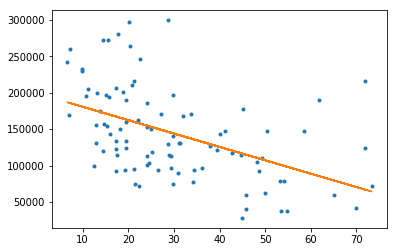

In [25]:
plt.plot(x_nohighend,y_nohighend,'.',
        x_nohighend,crime_model_nohighend.predict(x_nohighend),'-')